<h1 style="font-family: 'poppins'; font-weight: bold; color: aliceblue;">Flight Fare Prediction</h1>

<h3 style="font-family: 'poppins'; font-weight: bold; color: aliceblue; text-align: left;">Author: Rakesh Pawar</h3>

[![GitHub](https://img.shields.io/badge/github-grey?style=for-the-badge&logo=github)](https://github.com/pawarrrakesh08) 
[![Kaggle](https://img.shields.io/badge/Kaggle-white?style=for-the-badge&logo=kaggle)](https://www.kaggle.com/pawarrrakesh) 
[![LinkedIn](https://img.shields.io/badge/linkedin-blue?style=for-the-badge&logo=linkedin)](https://www.linkedin.com/in/pawarrrakesh/)  


## Problem Statement
Travelling through flights has become an integral part of today’s lifestyle as more and more people are opting for faster travelling options. The flight ticket prices increase or decrease every now and then depending on various factors like timing of the flights, destination, and duration of flights various occasions such as vacations or festive season. Therefore, having some basic idea of the flight fares before planning the trip will surely help many people save money and time.
The main goal is to predict the fares of the flights based on different factors available in the provided dataset.

### Content
#### Column Descriptions:

There are 300153 rows and 11 columns in the dataset.
* `Airline`: Categorical variable, Contains Airline company name , has 6 unique values.
* `Flight`: Categorical variable, Contains flight code prefix by company name abreviation.
* `Source City`: Categorical variable, Contains departure city , has 6 unique cities.
* `Departure Time`: Categorical variable, Contains departure time of the day like morrning, afternoon ,late night , has 6 unique timevalues.
* `Stops`: Categorical variable, Contains info like whether the flight is direct , has any stops , Has 3 Unique values.
* `Arrival Time`: Categorical variable, Contains arrival time of the day like morrning, afternoon ,late night , has 6 unique values.
* `Destination City`: Categorical variable, Contains landing city , has 6 unique cities.
* `Class`: Categorical variable, Contains information about seating class Business or Economy , has 2 unique values.
* `Duration`: Numerical variable, Displays the overall amount of time it takes to travel between cities in hours.
* `Days Left`: Numerical variable, Contains day's difference between booking date to flight date. 
* `Price`: Numrical variable, Target feature, Contains information about fare.



## Import Libaries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## Loading the Dataset

In [2]:
df = pd.read_csv("Flight_fare_data.csv")
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


Let's drop `unamed` column

In [3]:
df = df.drop(columns=['Unnamed: 0'])
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


## EDA (Exploratory Data Analysis)

### Colums & Data types

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


#### `Observations` 
1. No missing values
2. There are 300153 rows and 11 columns in the dataset.


### Stastical Description of Data

In [5]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


## Univariate Analysis

##### Common functions

In [6]:
def count_and_percent(column):
    unique_values = df[column].nunique()
    count = df[column].value_counts()
    percentage = (df[column].value_counts(normalize=True)*100)
    result_df = pd.DataFrame({'count':count, 'percentage': percentage.map('{:.2f}%'.format)})
    return result_df.style.background_gradient(cmap='Blues')

### `Airline`

In [7]:
count_and_percent(column='airline')

,count,percentage
airline,,
Vistara,127859,42.60%
Air_India,80892,26.95%
Indigo,43120,14.37%
GO_FIRST,23173,7.72%
AirAsia,16098,5.36%
SpiceJet,9011,3.00%


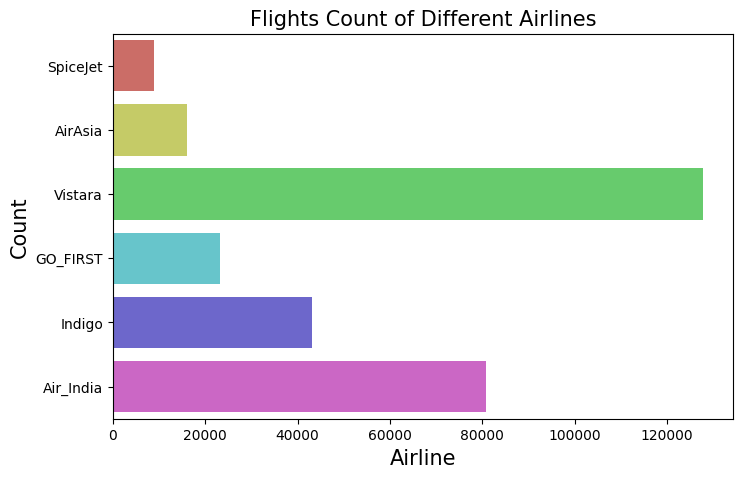

In [8]:
plt.figure(figsize=(8, 5))

# Create count plot
ax = sns.countplot(df['airline'], palette='hls')
# Set plot titles and labels
plt.title('Flights Count of Different Airlines', fontsize=15)
plt.xlabel('Airline', fontsize=15)
plt.ylabel('Count', fontsize=15)

# Show the plot
plt.show()

#### `Observations:`
1. `Vistara` airline is popilar airline with [***127859***] which is the highest number of flights and `42.60%` of total flights. 
2. `Spice jet` is less preferred airline with [***9011***] flights which is `3%` of total flights. 

###  `flight`

Top 10 flown airbus by Flight Code  

In [9]:
df['flight'].value_counts().sort_values(ascending=False).head(10).to_frame().reset_index().style.background_gradient(cmap='Wistia')

,flight,count
0,UK-706,3235
1,UK-772,2741
2,UK-720,2650
3,UK-836,2542
4,UK-822,2468
5,UK-828,2440
6,UK-874,2423
7,UK-832,2404
8,UK-826,2335
9,UK-860,2329


Bottom 10 airbus flown by flight code 

In [10]:
df['flight'].value_counts().sort_values(ascending=False).tail(10).to_frame().reset_index().style.background_gradient(cmap='Wistia')

,flight,count
0,SG-9974,1
1,SG-8339,1
2,I5-737,1
3,6E-6613,1
4,6E-5003,1
5,AI-9991,1
6,SG-8106,1
7,SG-1058,1
8,6E-2914,1
9,G8-107,1


### `source_city`

In [11]:
count_and_percent(column='source_city')

,count,percentage
source_city,,
Delhi,61343,20.44%
Mumbai,60896,20.29%
Bangalore,52061,17.34%
Kolkata,46347,15.44%
Hyderabad,40806,13.60%
Chennai,38700,12.89%


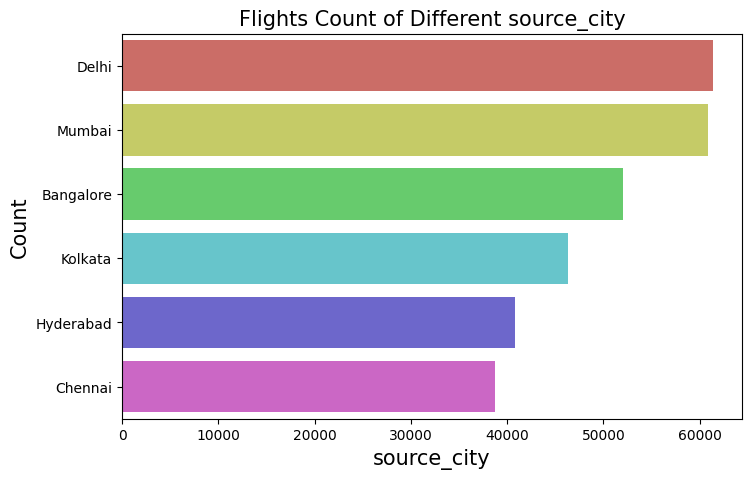

In [12]:
plt.figure(figsize=(8, 5))

# Create count plot
ax = sns.countplot(df['source_city'], palette='hls')
# Set plot titles and labels
plt.title('Flights Count of Different source_city', fontsize=15)
plt.xlabel('source_city', fontsize=15)
plt.ylabel('Count', fontsize=15)

# Show the plot
plt.show()

#### `Observation:`
1. `Delhi` [***61343***] has highest number of flights departure which is 20 % of total flights in Tier 1 cities and `chennai` [***38700***] has the lowest number of flight departed.
2. Mumbai is second highest departure city.

### `departure_time`

In [13]:
count_and_percent(column='departure_time')

,count,percentage
departure_time,,
Morning,71146,23.70%
Early_Morning,66790,22.25%
Evening,65102,21.69%
Night,48015,16.00%
Afternoon,47794,15.92%
Late_Night,1306,0.44%


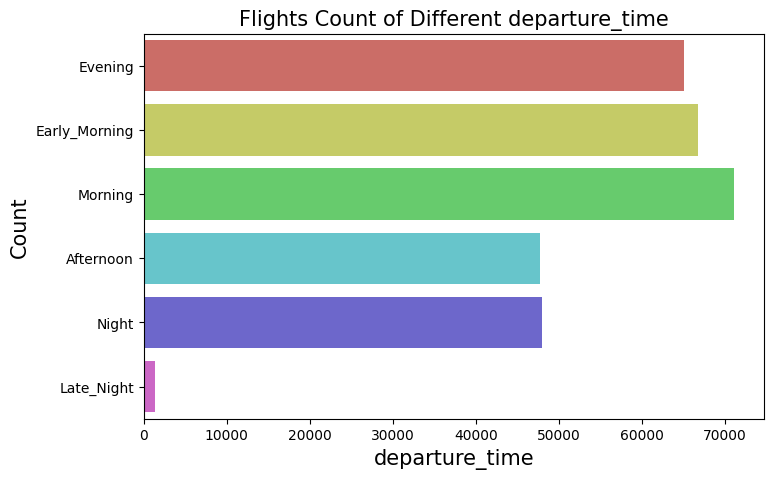

In [14]:
plt.figure(figsize=(8, 5))

# Create count plot
ax = sns.countplot(df['departure_time'], palette='hls')
# Set plot titles and labels
plt.title('Flights Count of Different departure_time', fontsize=15)
plt.xlabel('departure_time', fontsize=15)
plt.ylabel('Count', fontsize=15)

# Show the plot
plt.show()

#### `Observation:`

1. Highest number of the flights depart in the `Morning` [***71146***] and lowest number  flights in `Late night` [***1306***]. 
2. `Early Morning` flights are less in departs compared to `Morning` ,It could be because weather in early morning such as fogg, dark clouds, visibility.

### `stops`             

In [15]:
count_and_percent(column='stops')

,count,percentage
stops,,
one,250863,83.58%
zero,36004,12.00%
two_or_more,13286,4.43%


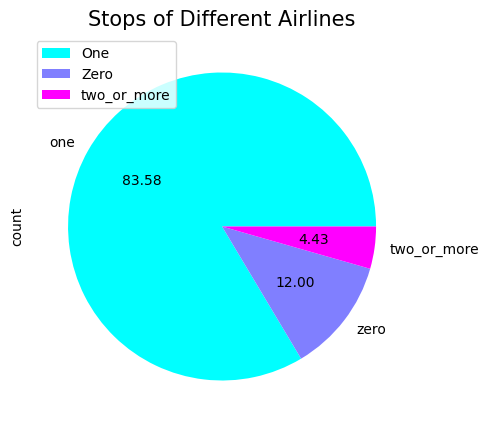

In [16]:
plt.figure(figsize=(5,5))
df['stops'].value_counts().plot(kind='pie',textprops={'color':'black'},autopct='%.2f',cmap='cool')
plt.title('Stops of Different Airlines',fontsize=15)
plt.legend(['One','Zero','two_or_more'])
plt.show()

#### `Observation:`
1. As per above dataset, we can see that highest number flights are `one` stop [***250863***] and `two or more` stops has the lowest number of flights [***13286***]. 
2. One stop flights are more preferred compared to Zero and two_or_more stops flights.

### `arrival_time`

In [17]:
count_and_percent(column='arrival_time')

,count,percentage
arrival_time,,
Night,91538,30.50%
Evening,78323,26.09%
Morning,62735,20.90%
Afternoon,38139,12.71%
Early_Morning,15417,5.14%
Late_Night,14001,4.66%


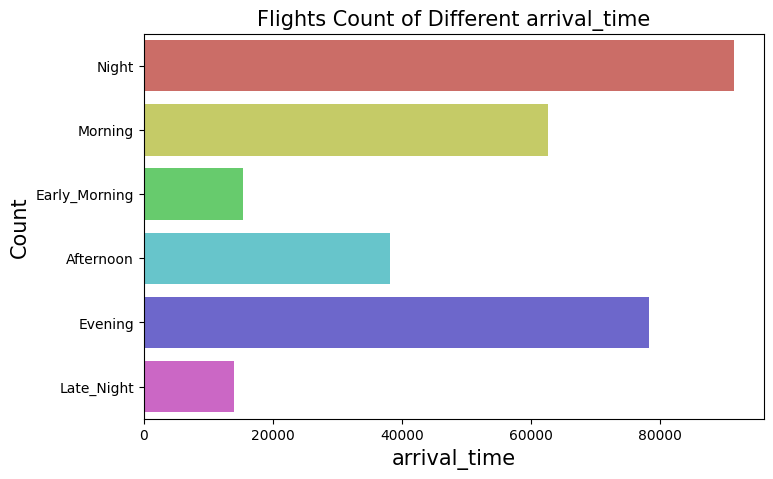

In [18]:
plt.figure(figsize=(8, 5))

# Create count plot
ax = sns.countplot(df['arrival_time'], palette='hls')
# Set plot titles and labels
plt.title('Flights Count of Different arrival_time', fontsize=15)
plt.xlabel('arrival_time', fontsize=15)
plt.ylabel('Count', fontsize=15)

# Show the plot
plt.show()

#### `Observation:`

1. Highest number of flights are landing at `Night` [***91538***] and lowest number of flights are landing at `Late_Night` [***14001***].
2. We have seen that most flights depart in the `morning` however more flights are landing at `night`. In the morning runways are busy for departures.

### `destination_city`

In [19]:
count_and_percent(column='destination_city')

,count,percentage
destination_city,,
Mumbai,59097,19.69%
Delhi,57360,19.11%
Bangalore,51068,17.01%
Kolkata,49534,16.50%
Hyderabad,42726,14.23%
Chennai,40368,13.45%


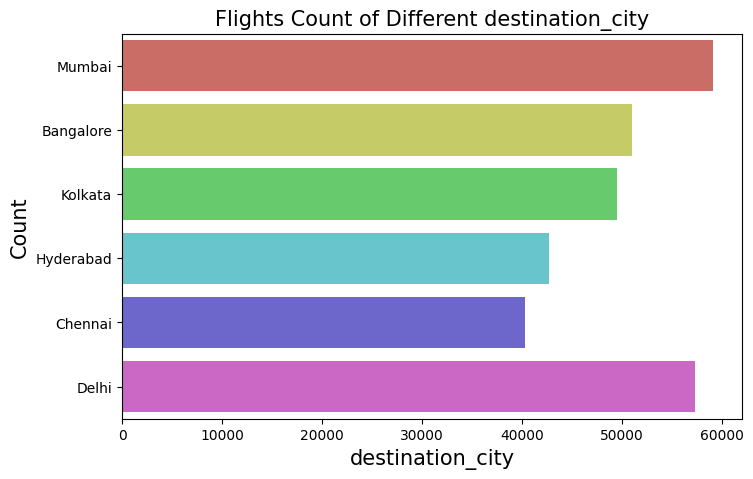

In [20]:
plt.figure(figsize=(8, 5))

# Create count plot
ax = sns.countplot(df['destination_city'], palette='hls')
# Set plot titles and labels
plt.title('Flights Count of Different destination_city', fontsize=15)
plt.xlabel('destination_city', fontsize=15)
plt.ylabel('Count', fontsize=15)

# Show the plot
plt.show()

#### `Observation:`
1. Mumbai is most preferred city for destination, there might several reason Mumbai is economical capital of India, Biggest MNC companies as well most celebrities are from Mumbai

### `class`

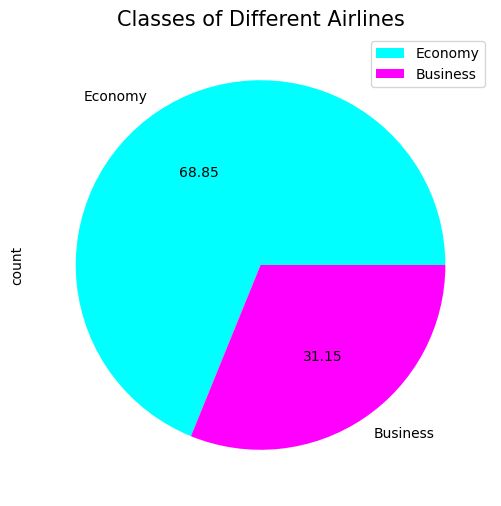

In [21]:
plt.figure(figsize=(6,6))
df['class'].value_counts().plot(kind='pie',textprops={'color':'black'},autopct='%.2f',cmap='cool')
plt.title('Classes of Different Airlines',fontsize=15)
plt.legend(['Economy','Business'])
plt.show()

#### `Observation:`
1. Highest number of passengers prefer `Economy` class which is 68.85 %.

### `duration`

Minimum duration : 0.83
25% percentile of duration : 6.83
Mean duration : 12.221020812718846
75% percentile of duration : 16.17
Maximum duration : 49.83


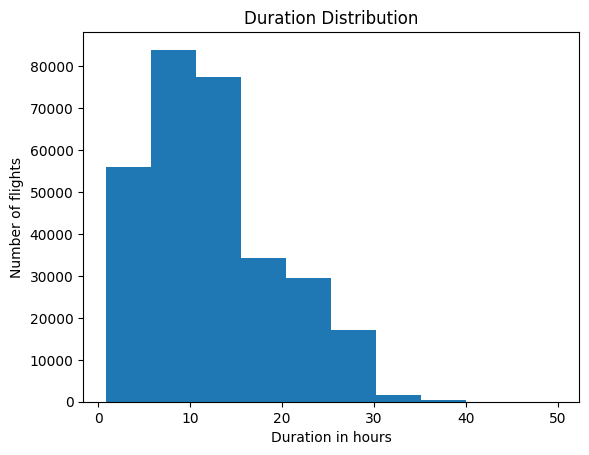

In [22]:
# Let' check the five number summary for this variable sa this is numerical variable
print("Minimum duration :",df['duration'].min())
print("25% percentile of duration :",df['duration'].quantile(0.25))
print("Mean duration :",df['duration'].mean())
print("75% percentile of duration :",df['duration'].quantile(0.75))
print("Maximum duration :",df['duration'].max())

df['duration'].plot(kind='hist')
plt.title("Duration Distribution")
plt.xlabel("Duration in hours")
plt.ylabel("Number of flights")
plt.show()

#### `Observation:`
1. We have flight with `minimum duration` of [***1 hour 23 mins***] ,`average flight duration` is between [***12 to 13***] hours.
2. `maximum duartion` of the flight is `49 hours` which is lasting flight for two days.

### `days_left`

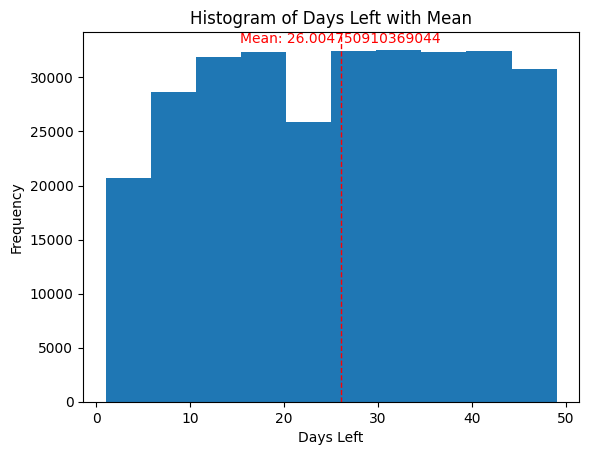

In [23]:
# Plot the histogram
ax = df['days_left'].plot.hist()

# Calculate statistical values
mean_days_left = df['days_left'].mean()

# Add vertical lines and labels
ax.axvline(mean_days_left, color='r', linestyle='dashed', linewidth=1)

# Add labels for the data points
ax.text(mean_days_left, ax.get_ylim()[1], f'Mean: {mean_days_left}', color='r', ha='center', va='top')

# Add labels and title
plt.xlabel('Days Left')
plt.ylabel('Frequency')
plt.title('Histogram of Days Left with Mean')

# Show the plot
plt.show()

#### `Observation:`
1. most of the flights are booked 26 days prior to journey date.
2. Most of the flight are booked before `36-40 days` prior to the journey [***20670***] which is 10% of the total flight booked and lowest is betwwen `1-5` [***20670***].

### `Price`

Mean: 20889.660523133203
Min: 1105
Max: 123071
Q1: 4783.0
Q3: 42521.0


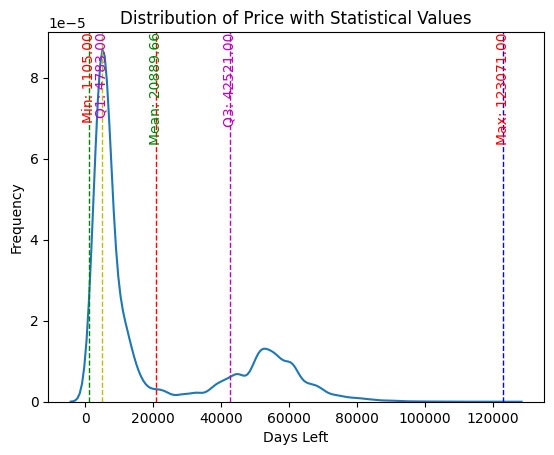

In [24]:
# Plot the distribution plot
sns.kdeplot(df['price'])

# Calculate statistical values
mean_price = df['price'].mean()
min_price = df['price'].min()
max_price = df['price'].max()
q1_price = df['price'].quantile(0.25)
q3_price = df['price'].quantile(0.75)

print(f'Mean: {mean_price}')
print(f'Min: {min_price}')
print(f'Max: {max_price}')
print(f'Q1: {q1_price}')
print(f'Q3: {q3_price}')

# Add vertical lines and labels
plt.axvline(mean_price, color='r', linestyle='dashed', linewidth=1)
plt.axvline(min_price, color='g', linestyle='dashed', linewidth=1)
plt.axvline(max_price, color='b', linestyle='dashed', linewidth=1)
plt.axvline(q1_price, color='y', linestyle='dashed', linewidth=1)
plt.axvline(q3_price, color='m', linestyle='dashed', linewidth=1)

# Add labels for the data points
plt.text(mean_price, plt.ylim()[1], f'Mean: {mean_price:.2f}', color='g', ha='center', va='top',rotation=90)
plt.text(min_price, plt.ylim()[1], f'Min: {min_price:.2f}', color='r', ha='center', va='top',rotation=90)
plt.text(max_price, plt.ylim()[1], f'Max: {max_price:.2f}', color='r', ha='center', va='top',rotation=90)
plt.text(q1_price, plt.ylim()[1], f'Q1: {q1_price:.2f}', color='m', ha='center', va='top',rotation=90)
plt.text(q3_price, plt.ylim()[1], f'Q3: {q3_price:.2f}', color='m', ha='center', va='top',rotation=90)

# Add labels and title
plt.xlabel('Days Left')
plt.ylabel('Frequency')
plt.title('Distribution of Price with Statistical Values')

# Show the plot
plt.show()

#### `Observation:`
1. `Average` flight fare is `20000 to 21000`, `minimum` flight fare is `1100` and `maximum` more than `1 lakh`.
2. price distribution is right skewed.

## Bivariate Analysis

Q1. Which airline exhibits the widest price range?
 
1. Vistara showcasing the maximum price variation among all airlines
2. Vistara and Air_India Airlines Have Maximum Price when compared to Others.
3. SpiceJet , AirAsia , GO_First and Indigo appear to have relatively similar pricing structures.


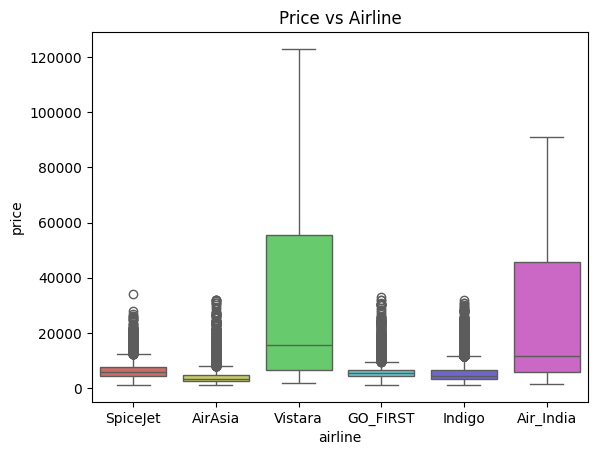

In [25]:
sns.boxplot(x="airline",y="price",data=df,palette='hls')
plt.title("Price vs Airline")
plt.show()

Q2. How do prices vary across different source cities, and what insights can be drawn from the relationship between price and the originating cities?

1. Kolkata has maximum fligt fares compared to other.    
2. Mumbai and chennai have similarity in filght fares.

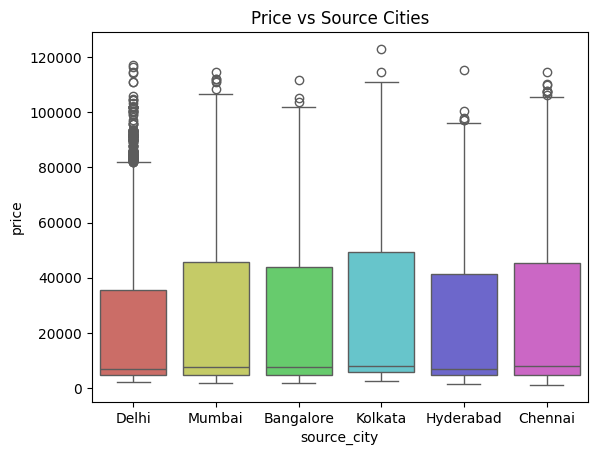

In [26]:
sns.boxplot(x="source_city",y="price",data=df,palette='hls')
plt.title("Price vs Source Cities")
plt.show()

Q3. How does the price of flights vary with respect to the departure time, and what trends or patterns can be observed in this relationship between price and departure time?

1. Night flight have maximum range of flight fare.
2. Late Night flight fare is minimum compared to other departure times.
3. Evening, Early Morning and Morning departure filght apper to have similarity in flight fares.

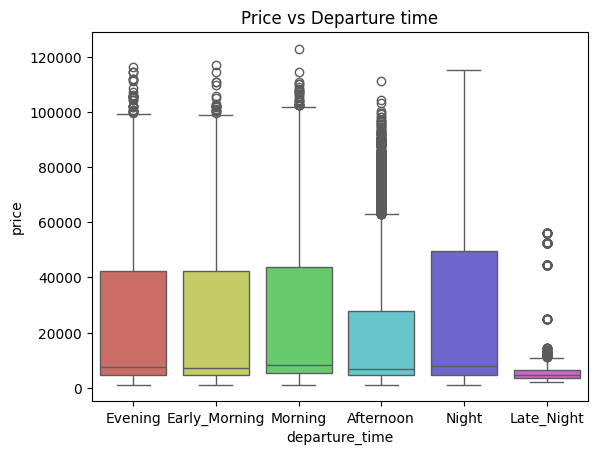

In [27]:
sns.boxplot(x="departure_time",y="price",data=df,palette='hls')
plt.title("Price vs Departure time")
plt.show()

Q4. How does the price of flights correlate with the number of stops?
1. One stop flights have the widest range of fare compared to other.

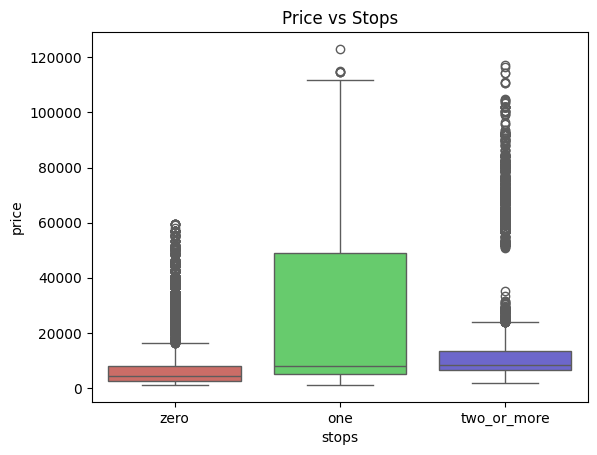

In [28]:
sns.boxplot(x="stops",y="price",data=df,palette='hls')
plt.title("Price vs Stops")
plt.show()

Q5. How does the price of flights relate to the arrival time, and what patterns or trends can be discerned from analyzing the connection between price and arrival time?

1. Ticket Price is More for the Flights when the Arrival Time is at Evening
2. Ticket Price is almost equal for flights Having Arrival time is at Morning and Night
3. Ticket Price is Low for the Flights Having Arrival Time at Late_night as same as Departure Time


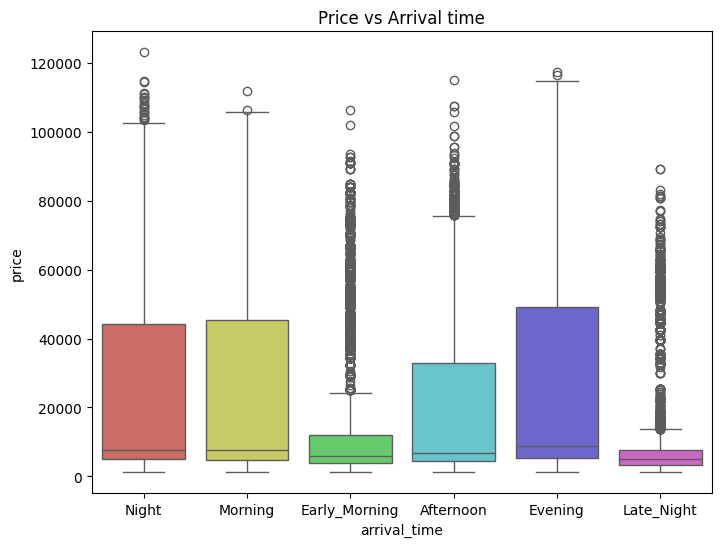

In [29]:
plt.figure(figsize=(8,6)           )
sns.boxplot(x="arrival_time",y="price",data=df,palette='hls')
plt.title("Price vs Arrival time")
plt.show()

Q6. how does the balance between price and destination influence travel experiences?

1. Kolkata as destination has widest range of fare than the rest.
2. Mumbai,Banglore and Hyderabad have similar fare ranges as destination city.
3. Delhi has lowest fare range.

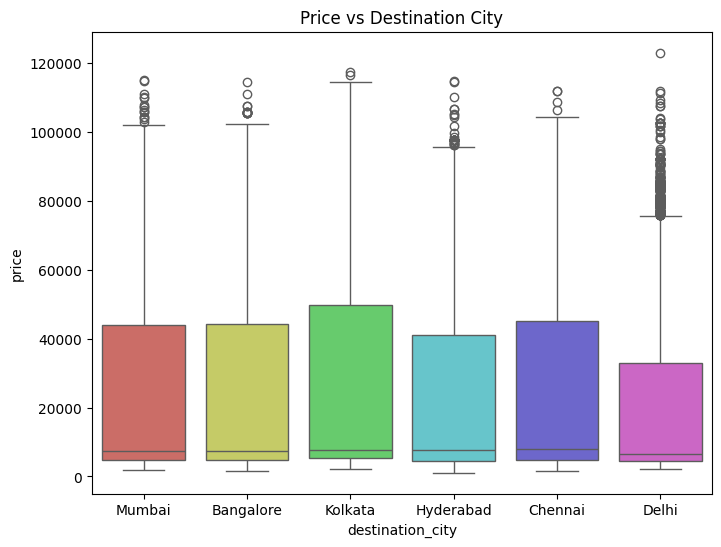

In [30]:
plt.figure(figsize=(8,6))
sns.boxplot(x="destination_city",y="price",data=df,palette='hls')
plt.title("Price vs Destination City")
plt.show()

Q7. How does the price of airline tickets vary across different seat classes?

1. There is huge dfiffernce between fare between Business and Economy class seats.

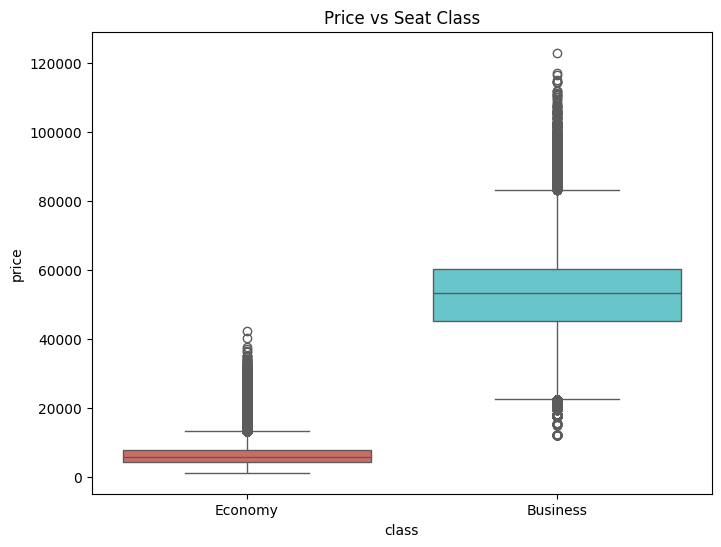

In [31]:
plt.figure(figsize=(8,6))
sns.boxplot(x="class",y="price",data=df,palette='hls')
plt.title("Price vs Seat Class")
plt.show()

Q8. What is the relationship between the price of airline tickets and the duration of the flight?

1. We can see that less duration of the flights are more expensive compared to long hours of flights.

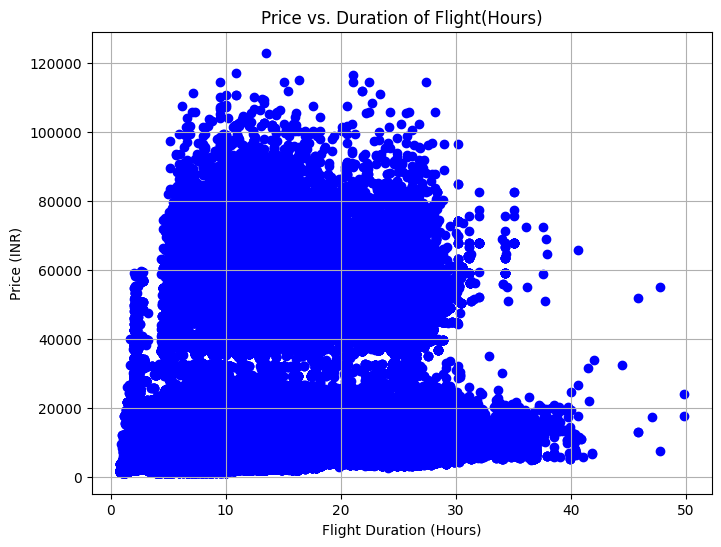

In [49]:
# Create Scatter Plot
plt.figure(figsize=(8, 6))
plt.scatter(df['duration'], df['price'], color='blue')
plt.title('Price vs. Duration of Flight(Hours)')
plt.xlabel('Flight Duration (Hours)')
plt.ylabel('Price (INR)')
plt.grid(True)
plt.show()

Q9. How does the price of airline tickets fluctuate based on the number of days left before the flight departure, and what patterns or trends can be observed from analyzing the relationship between ticket prices and the proximity to the travel date?

1. We can observe that maximum the day's difference between the flight and booking date less the fare of the flight.
2. Less the day difference between flight and booking more the fare price.
3. Passenger to get best price , should book the flight prior 40 days to flight date however we see there is exponential growth in prices in remaining last 15 days to flight.  

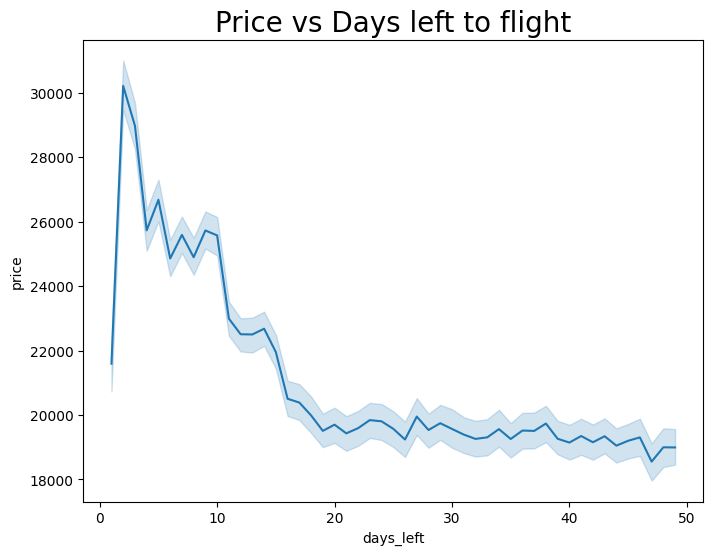

In [54]:
plt.figure(figsize=(8,6))
sns.lineplot(x="days_left",y="price",data=df,palette='hls')
plt.title("Price vs Days left to flight",fontsize=20)
plt.show()

## Mulivarite Analysis

Q1. How does the price of airline tickets vary across different airlines while considering the class of seating?

1. Given dataset we can see that there is business class data is available only for Vistara and AirIndia and rest of airlines does not have the business class data. we can further investigate whether this arilines offers business class or any other class seats apart from Economy
2. For Business class in Vistara one has pay to average fare price more than 50000 and AirIndia the average price is less than 50000 somewhere at 45000 to 48000
3. Air Asia has the lowest average fare price compared to others. Vistara is leading this seating class followed by AirIndia

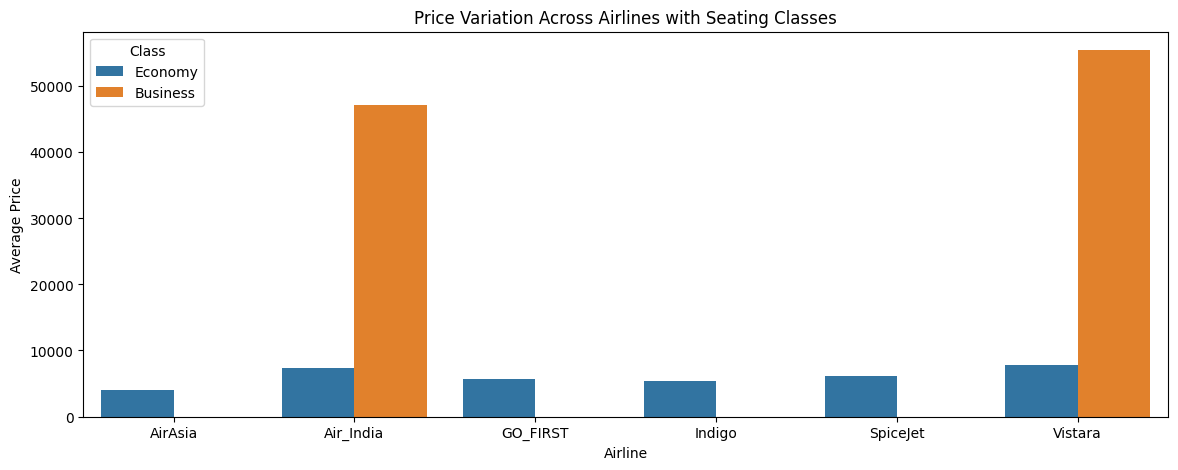

In [68]:
airline_class_avg_price = df.groupby(['airline','class'])['price'].mean().reset_index()

# Visualize the data using a seaborn barplot
plt.figure(figsize=(14, 5))
sns.barplot(x='airline', y='price', hue='class', data=airline_class_avg_price)
plt.title('Price Variation Across Airlines with Seating Classes')
plt.xlabel('Airline')
plt.ylabel('Average Price')
# plt.xticks(rotation=45)
plt.legend(title='Class')
plt.show()

In [72]:
airline_sourcecities_avg_price = df.groupby(['airline','source_city'])['price'].mean().reset_index()
airline_sourcecities_avg_price

# # Visualize the data using a seaborn barplot
# plt.figure(figsize=(14, 5))
# sns.barplot(x='airline', y='price', hue='source_city', data=airline_class_avg_price)
# plt.title('Price Variation Across Airlines with Source_city')
# plt.xlabel('Airline')
# plt.ylabel('Average Price')
# # plt.xticks(rotation=45)
# plt.legend(title='Class')
# plt.show()

,airline,source_city,price
0,AirAsia,Bangalore,4222.787158
1,AirAsia,Chennai,3243.964619
2,AirAsia,Delhi,4514.854798
3,AirAsia,Hyderabad,3359.273319
4,AirAsia,Kolkata,4504.940615
5,AirAsia,Mumbai,3698.312960
6,Air_India,Bangalore,24874.431796
7,Air_India,Chennai,25415.500908
8,Air_India,Delhi,21899.890758
9,Air_India,Hyderabad,22458.063853


In [71]:
df.columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')


2. Is there a correlation between the duration of the flight and the price of the ticket, considering different airlines and the number of stops?
3. What insights can be gained from analyzing the relationship between departure times, arrival times, and the price of airline tickets, accounting for the class of seating?
4. How do the number of days left before the flight and the price of the ticket interact, considering different airlines, departure times, and destination cities?
5. Can we identify any significant trends in ticket pricing based on the combination of factors such as airline, departure time, stops, and days left before the flight?
6. How does the presence of stops affect the relationship between the duration of the flight and the price of the ticket, taking into account different airlines and departure times?
7. Is there a noticeable difference in ticket pricing between business and economy class seats across various airlines, departure times, and destination cities, and how does this relate to the duration of the flight?
8. What patterns emerge when examining the relationship between the number of days left before the flight, departure times, and the duration of the flight, with respect to ticket pricing across different airlines and seating classes?